In [1]:
# 필수 라이브러리 호출

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titan_df = pd.read_csv('./titanic/train.csv', engine='python')
titan_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ###학습 데이터 정보###\n')
print(titan_df.info())


 ###학습 데이터 정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titan_df.Age.fillna(titan_df.Age.mean(), inplace=True)
titan_df.Cabin.fillna('N', inplace=True)
titan_df.Embarked.fillna('N', inplace=True)
print('데이터셋 Null 값 개수', titan_df.isnull().sum().sum())

데이터셋 Null 값 개수 0


In [4]:
# titan_df Cabin 분포 살펴보기
titan_df.Cabin.str[0].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [5]:
# 성별에 따른 생존률과의 관계 
titan_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
# 여성의 생존률
np.round(233/314,3)

0.742

In [7]:
# 남성의 생존률
np.round(109/(109+468),3)

0.189

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

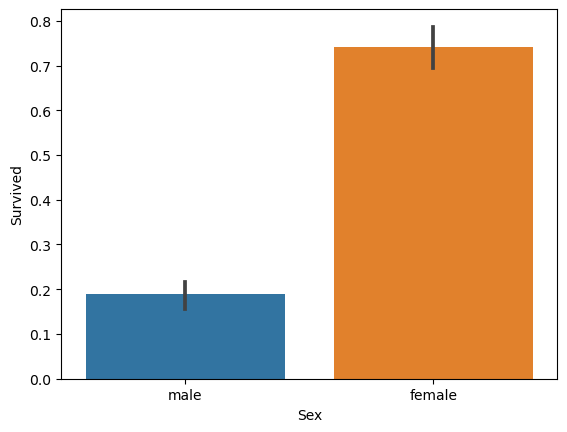

In [8]:
# sns-seaborn을 통한 데이터 시각화 - 성별 vs 생존률

sns.barplot(x='Sex', y='Survived', data=titan_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

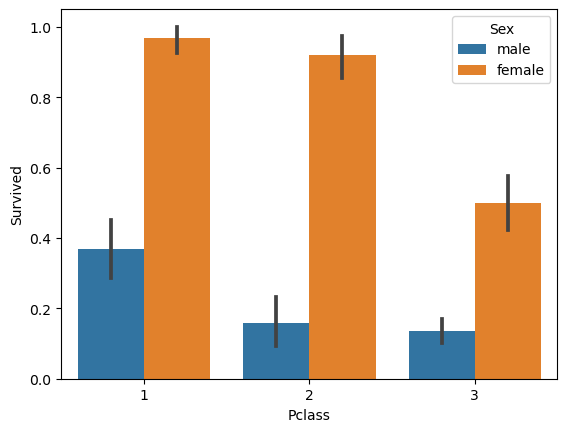

In [9]:
# sns를 활용 바차트 - 빈부 vs 생존률 hue = Sex

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titan_df)

In [10]:
# 입력 age에 따라서 구분 값을 반환하는 함수 생성
# df의 apply lambda에 적용.
def get_cat(df_age):
    char = '' # 초기설정을 문자열로 했다.
    
    if df_age <=-1: char='unknown'
    elif df_age <=5: char='baby'
    elif df_age <=12: char='child'
    elif df_age <=18: char='teen'
    elif df_age <=25: char='student'
    elif df_age <=35: char= 'young_adult'
    elif df_age <=60: char= 'adult'
    else: char='elderly'
        
    return char    

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

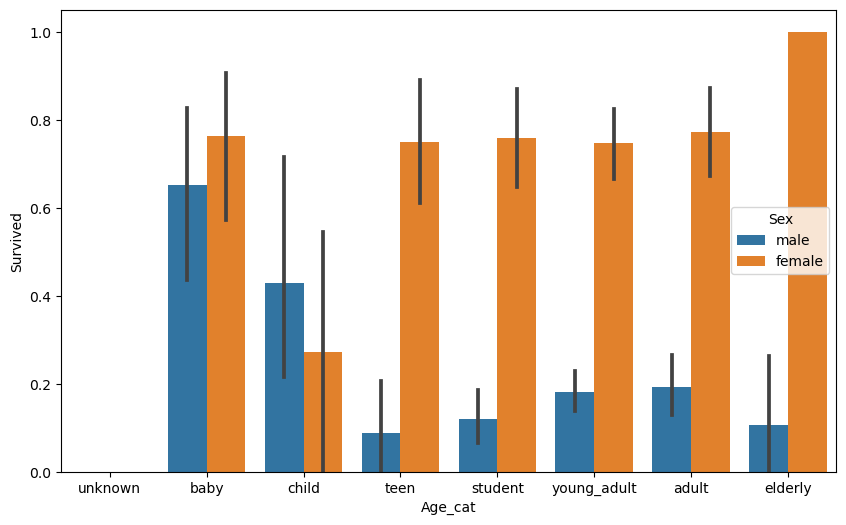

In [11]:
# 막대그래프의 크기 figure를 더 크게 설정- plt(matplotlib)
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위해 리스트 생성
group_names = ['unknown', 'baby', 'child', 'teen', 'student', 'young_adult',
              'adult', 'elderly']

# X축의 값을 - get_cat(x)로 정의 
titan_df['Age_cat'] = titan_df.Age.apply(lambda x: get_cat(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titan_df, order=group_names)

In [12]:
titan_df1 = titan_df.drop(['Age_cat'], axis=1)

In [20]:
# 문자들을 -> 숫자로 변환
# 문자들을 색출
# 1. titan_df1.info()

# 2.select_dtypes를 통해 문자열 자료로 선택
titan_df1.select_dtypes(include=object).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [25]:
# 문자 -> 숫자 :: 1) 레이블(정수) 인코딩 vs 2) 원-핫 인코딩-pd.get_dummies()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [31]:
# titan_df1['Name'] = le.fit_transform(titan_df1['Name'])

In [32]:
# titan_df1

In [36]:
from sklearn.preprocessing import LabelEncoder

ftrs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for ftr in ftrs:    
    le = LabelEncoder() # 레이블 인코딩 객체화 
    titan_df1[ftr] = le.fit_transform(titan_df1[ftr]) # 원본이 안바뀌므로 다시금 재정의가 필요 



In [40]:
# ML(Machine-Learning) 알고리즘에서 불필요 컬럼(=속성) 제거 
# 일반적으로 식별자를 제거

titanic_df = titan_df1.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [46]:
# 위의 전처리 과정을 함수화 진행 - 
# 1) 결측치 <- 대체
# 2) 문자 -> 숫자
# 3) 불필요속성 제거 

# 1) Null처리 함수
def fill_null(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)# 평균값 대체
    df['Fare'].fillna(0, inplace=True) #최소값 대체
    df['Cabin'].fillna('N', inplace=True) # 결측치를 'N'으로 대체
    df['Embarked'].fillna('N', inplace=True) # 결측치를 'N'으로 대체
    
    return df

In [48]:
# 2) 문자 -> 숫자 함수
from sklearn.preprocessing import LabelEncoder

def le_ftrs(df):
    
    ftrs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] # 문자열 데이터 
    for ftr in ftrs:    
        le = LabelEncoder() # 레이블 인코딩 객체화 
        df[ftr] = le.fit_transform(df[ftr]) # 원본이 안바뀌므로 다시금 재정의가 필요 
        
    return df

In [52]:
# 3) 불필요속성 제거 
def drop_ftrs(df):
    df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
    return df

In [54]:
# 4) = 1) + 2) + 3) 함수화
def pre_all_ftrs(df):
    
    df = fill_null(df)
    df = le_ftrs(df)
    df = drop_ftrs(df)
    
    return df

In [58]:
bef_titan = pd.read_csv('./titanic/train.csv')

pre_all_ftrs(bef_titan)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,3
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,3
3,1,1,0,35.000000,1,0,53.1000,3
4,0,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3
887,1,1,0,19.000000,0,0,30.0000,3
888,0,3,0,29.699118,1,2,23.4500,3
889,1,1,1,26.000000,0,0,30.0000,0


In [60]:
after_titan = bef_titan.copy()

In [61]:
bef_test = pd.read_csv('./titanic/test.csv')
pre_all_ftrs(bef_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [62]:
# END of File